In [16]:
import seaborn as sns
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics in Italy
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
italy_region_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'TotalPositiveCases']].style.background_gradient(cmap=cm).hide_index()


# COVID-19 statistics in Italy
## Last Updated: 2020-03-17 17:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases


RegionName,TotalPositiveCases
Lombardia,16220
Emilia Romagna,3931
Veneto,2704
Piemonte,1897
Marche,1371
Toscana,1053
Liguria,778
Lazio,607
Campania,460
Friuli Venezia Giulia,394


In [17]:
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'ProvinceName', 'TotalPositiveCases']][:20].style.background_gradient(cmap=cm).hide_index()

RegionName,ProvinceName,TotalPositiveCases
Lombardia,Bergamo,3993
Lombardia,Brescia,3300
Lombardia,Milano,2326
Lombardia,Cremona,2073
Lombardia,Lodi,1418
Emilia Romagna,Piacenza,1204
Lombardia,Pavia,884
Marche,Pesaro e Urbino,812
Emilia Romagna,Parma,800
Veneto,Padova,781


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Markdown
import folium
# may require pip install folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [3]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [4]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-17 17:00:00
(483, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,483.0,211.418219,788.271426,0.0,1.0,12.0,86.5,7832.0
Deaths,483.0,27.797101,140.713358,0.0,0.0,0.0,5.0,1640.0
TotalPositiveCases,483.0,423.677019,1554.355967,0.0,3.0,28.0,205.0,16220.0
TestsPerformed,483.0,2529.434783,6221.488970,0.0,60.5,367.0,1707.5,46449.0


In [5]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-17 17:00:00
TotalHospitalizedPatients                   7832
Deaths                                      1640
TotalPositiveCases                         16220
TestsPerformed                             46449
dtype: object

In [9]:
display(Markdown("""
### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at {last_date}). 
""".format(last_date=last_date)))


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at 2020-03-17 17:00:00). 


In [10]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

471                Lombardia
467           Emilia Romagna
482                   Veneto
474                 Piemonte
472                   Marche
478                  Toscana
470                  Liguria
469                    Lazio
466                 Campania
468    Friuli Venezia Giulia
479              P.A. Trento
475                   Puglia
464             P.A. Bolzano
477                  Sicilia
462                  Abruzzo
480                   Umbria
481            Valle d'Aosta
476                 Sardegna
465                 Calabria
473                   Molise
463               Basilicata
Name: RegionName, dtype: object

# Statistics per region

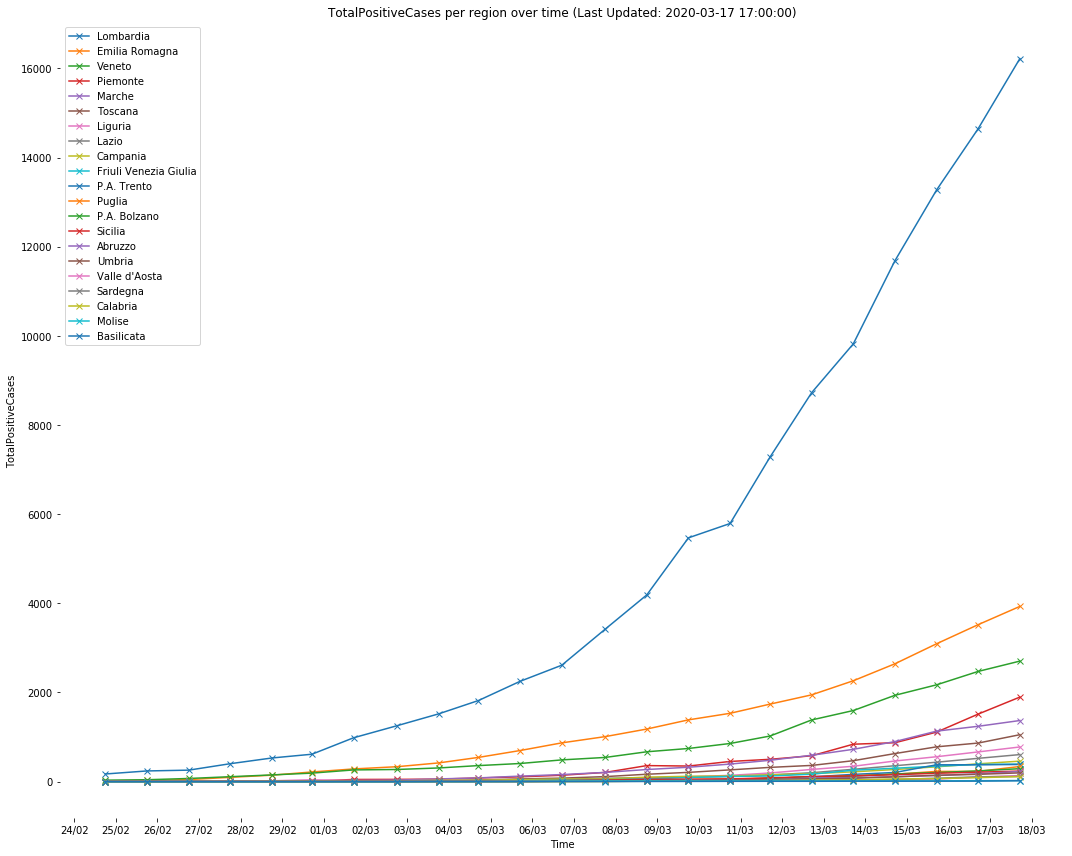

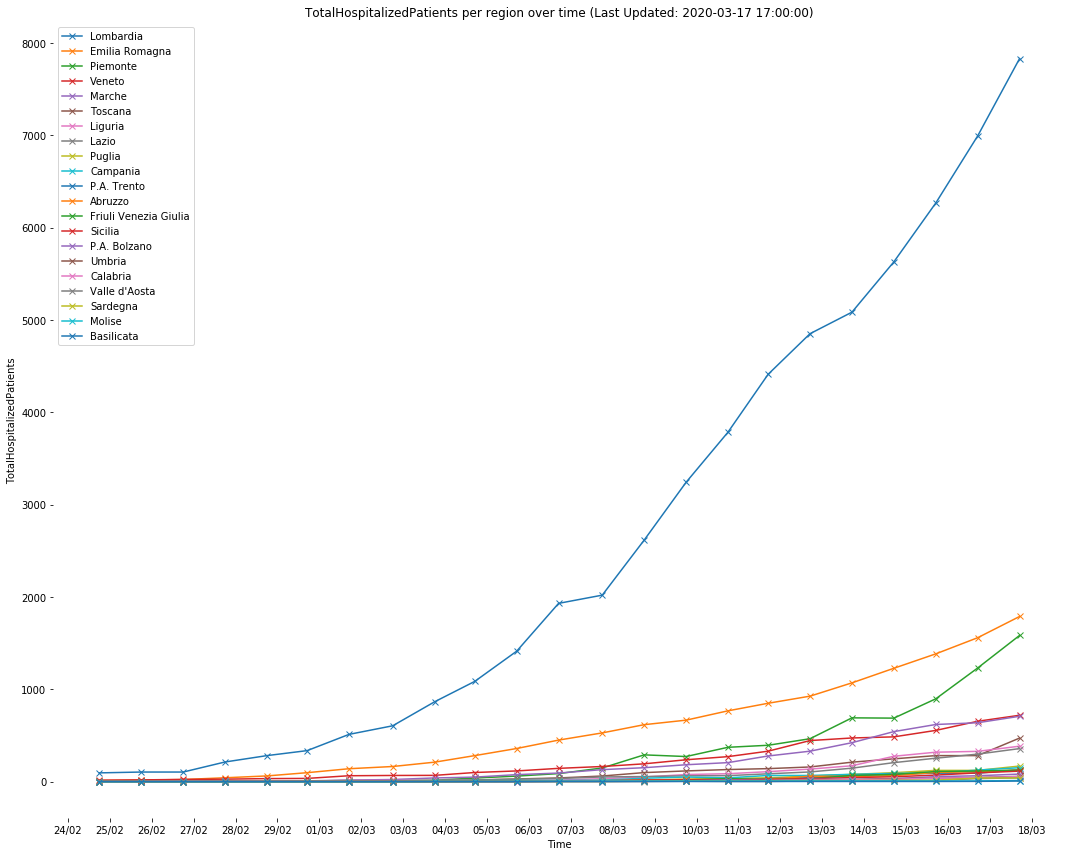

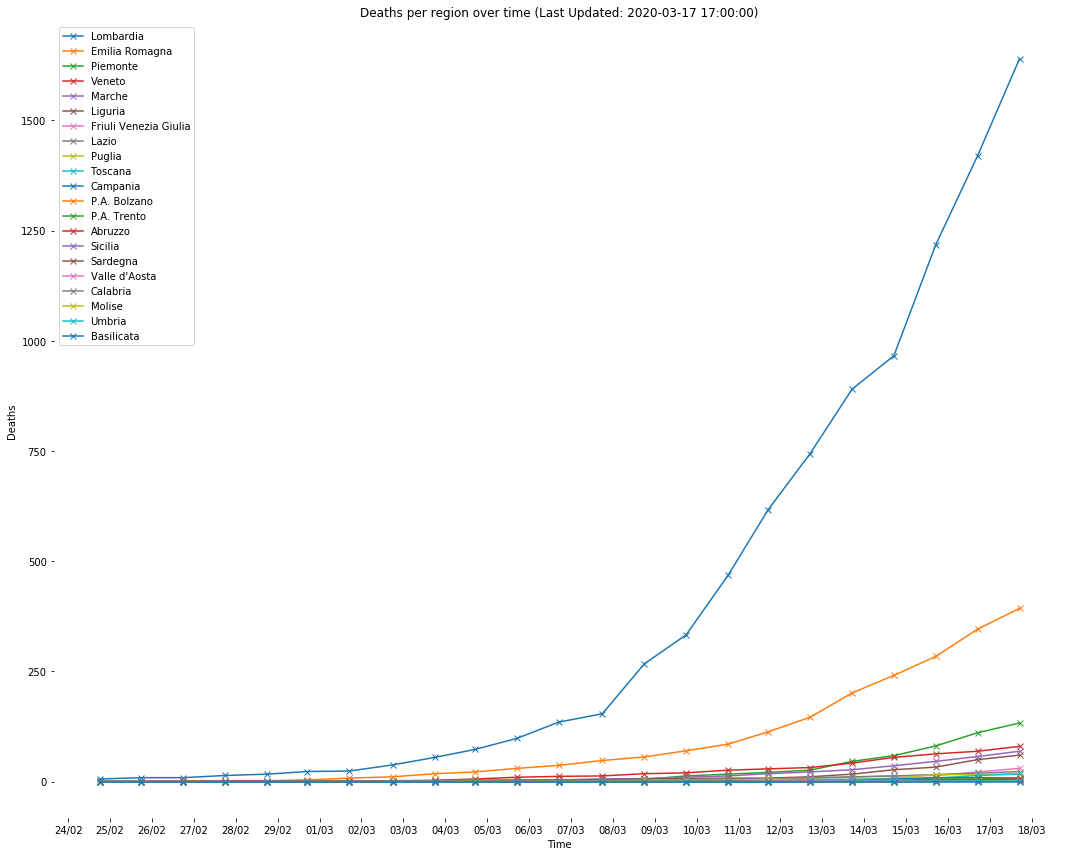

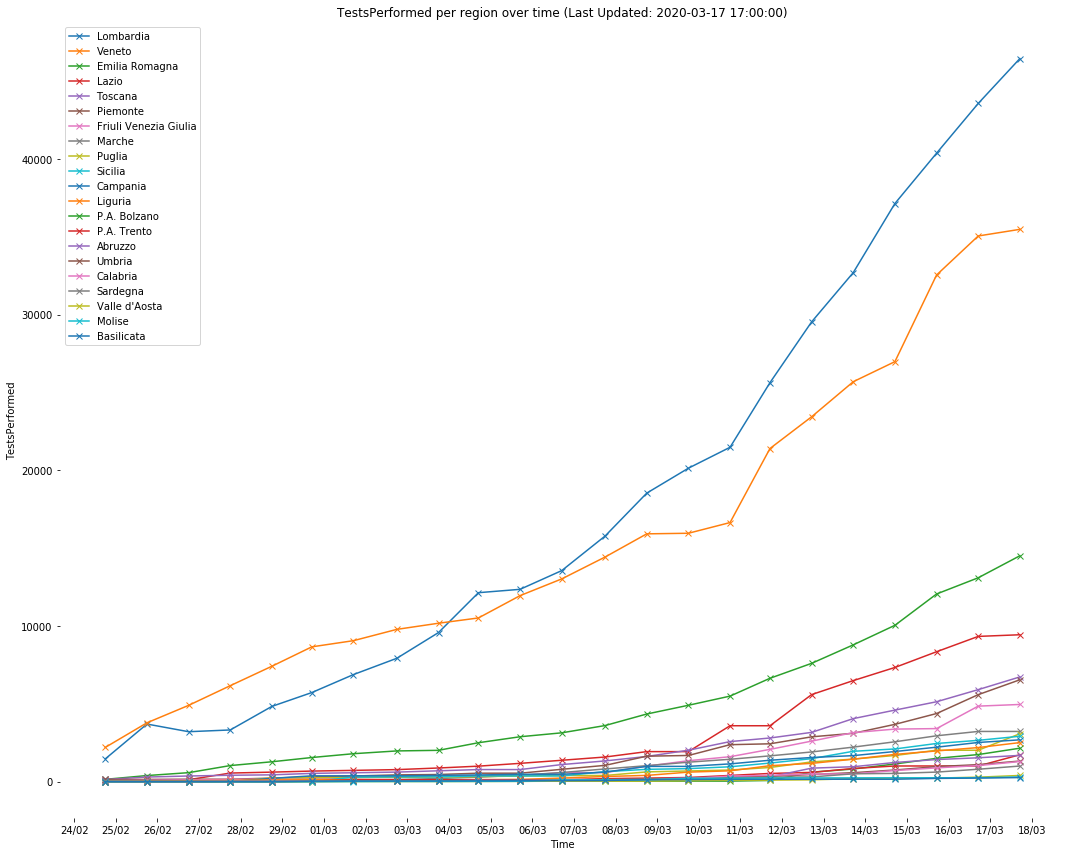

In [11]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [12]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]

# Regional geolocation

In [13]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/350,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [14]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]

# Provincial geolocation

In [15]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map